# QFT Matrix Calculator

Writing QFT matrix manually can be Boring And computing could be time consuming. 


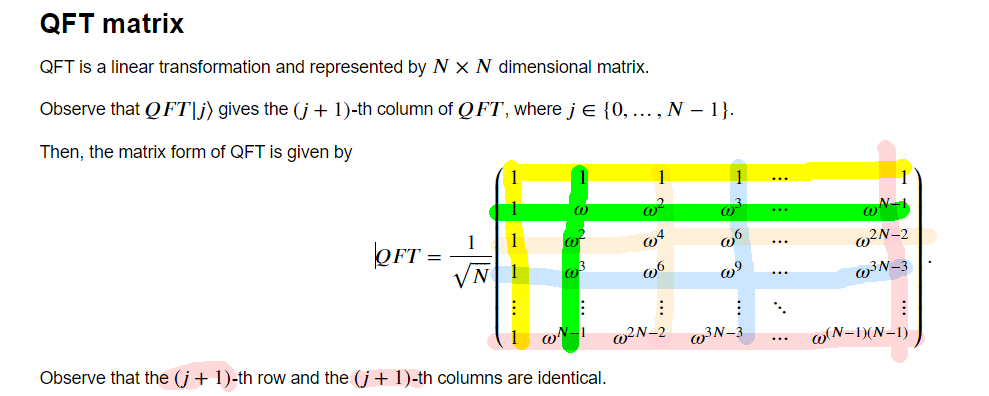

In [71]:
def qft_matrix_render_and_find(sv_entries_count):
    import numpy as np 
    import cmath
    from IPython.display import display, Markdown
    print("QFT matrix for qubit statevctor of with ", sv_entries_count, " is:\n")
    
    text = r'$QFT=\frac{1}{\sqrt{N}} \begin{bmatrix}'
    ele = ''
    dim = sv_entries_count
    
    # Code for rendering loop 
    for i in range(dim): # row indexer = Table
        for j in range(dim): # column indexer
            exponent = i * j 
            if exponent == 0:
                ele = '1'
            elif exponent == 1:
                ele = '\omega'
            else:
                ele = '\omega^{'+str(exponent)+'}'
                
            if j == dim-1:
                text = text + r' ' + ele + r' \\'
            else:        
                text = text + r' ' + ele + r' &'
     # end of for   
    text = text + r' \end{bmatrix}$'
    display(Markdown(text))
    
    # Code for calculating matrix
    qft_matrix = np.zeros(sv_entries_count*sv_entries_count).reshape(sv_entries_count,sv_entries_count)
 
    for i in range(dim): 
        for j in range(dim): 
            qft_matrix[i][j] = cmath.exp( 2*cmath.pi*1j*i*j / sv_entries_count)      
           
    #print("\n\nComputed Matrix:\n")
    #print(np.around(qft_matrix,3))
    
    #qft_matrix = np.around(qft_matrix,3)
    
    return qft_matrix
    
    

In [86]:
# Size of state vector 
# QFT does not distinguish if the state (vector) is a two-level system (qubit)
# or a combination of multi-level state qutrits 

# sv size is power of 2 but could be any value as well e.g. for sv size 3 means its a qutrit a 3 level system 
sv_size = 7  
qft_matrix_render(sv_size) 

QFT matrix for qubit statevctor of with  7  is:



$QFT=\frac{1}{\sqrt{N}} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 & 1 & 1 \\ 1 & \omega & \omega^{2} & \omega^{3} & \omega^{4} & \omega^{5} & \omega^{6} \\ 1 & \omega^{2} & \omega^{4} & \omega^{6} & \omega^{8} & \omega^{10} & \omega^{12} \\ 1 & \omega^{3} & \omega^{6} & \omega^{9} & \omega^{12} & \omega^{15} & \omega^{18} \\ 1 & \omega^{4} & \omega^{8} & \omega^{12} & \omega^{16} & \omega^{20} & \omega^{24} \\ 1 & \omega^{5} & \omega^{10} & \omega^{15} & \omega^{20} & \omega^{25} & \omega^{30} \\ 1 & \omega^{6} & \omega^{12} & \omega^{18} & \omega^{24} & \omega^{30} & \omega^{36} \\ \end{bmatrix}$

# Compute Matrix 

In [81]:
def qft_matrix_compute(sv_entries_count, precision=3):
    import numpy as np 
    import cmath
    dim = sv_entries_count

    #qft_matrix = [complex(0.0,0.0)] * sv_entries_count*sv_entries_count
    
    qft_matrix = np.zeros((sv_entries_count,sv_entries_count), dtype=complex)

    for i in range(dim): 
        for j in range(dim): 
            qft_matrix[i][j] = cmath.exp( 2*cmath.pi*1j*i*j / sv_entries_count)      
           
    qft_matrix = np.around(qft_matrix,precision)
    return qft_matrix
    
    

In [88]:
sv_size = 5 # WARNING Must not pass other value than 
qft_matrix = qft_matrix_compute(sv_size,3)
print("Shape of QFT matrix is: ",np.shape(qft_matrix))
print("Computed QFT matrix is:\n\n",qft_matrix)

print("---------------------\n")
print("Real(QFT matrix) is:\n\n",qft_matrix.real)
print("---------------------\n")
print("Imag(QFT matrix) is:\n\n",qft_matrix.imag)

Shape of QFT matrix is:  (5, 5)
Computed QFT matrix is:

 [[ 1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j     1.   +0.j   ]
 [ 1.   +0.j     0.309+0.951j -0.809+0.588j -0.809-0.588j  0.309-0.951j]
 [ 1.   +0.j    -0.809+0.588j  0.309-0.951j  0.309+0.951j -0.809-0.588j]
 [ 1.   +0.j    -0.809-0.588j  0.309+0.951j  0.309-0.951j -0.809+0.588j]
 [ 1.   +0.j     0.309-0.951j -0.809-0.588j -0.809+0.588j  0.309+0.951j]]
---------------------

Real(QFT matrix) is:

 [[ 1.     1.     1.     1.     1.   ]
 [ 1.     0.309 -0.809 -0.809  0.309]
 [ 1.    -0.809  0.309  0.309 -0.809]
 [ 1.    -0.809  0.309  0.309 -0.809]
 [ 1.     0.309 -0.809 -0.809  0.309]]
---------------------

Imag(QFT matrix) is:

 [[ 0.     0.     0.     0.     0.   ]
 [ 0.     0.951  0.588 -0.588 -0.951]
 [ 0.     0.588 -0.951  0.951 -0.588]
 [ 0.    -0.588  0.951 -0.951  0.588]
 [ 0.    -0.951 -0.588  0.588  0.951]]
